<a href="https://colab.research.google.com/github/qutren2108/Sustainability_LC-NC/blob/main/GHG_Emissions_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install networkx matplotlib pandas


1. Input activity data  
2. Validate data format  
3. Match with emission factors  
4. Calculate CO₂ equivalent  
5. Aggregate by category  
6. Generate summary table  
7. Export report


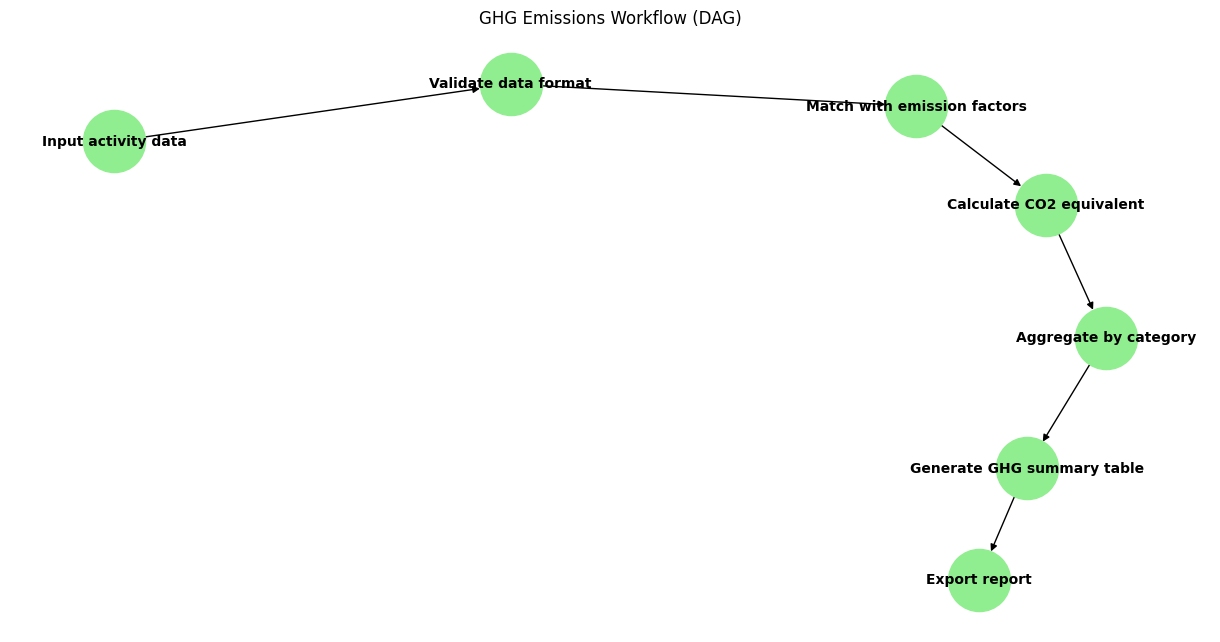

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# A directed graph
G = nx.DiGraph()

# Workflow tasks as nodes
tasks = {
    1: "Input activity data",
    2: "Validate data format",
    3: "Match with emission factors",
    4: "Calculate CO2 equivalent",
    5: "Aggregate by category",
    6: "Generate GHG summary table",
    7: "Export report"
}

for node_id, label in tasks.items():
    G.add_node(node_id, label=label)

# Dependencies (edges)
edges = [
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (6, 7)
]
G.add_edges_from(edges)

# To visualize the DAG
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')

plt.figure(figsize=(12, 6))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color="lightgreen", font_size=10, font_weight="bold")
plt.title("GHG Emissions Workflow (DAG)")
plt.show()


In [ ]:
import random

# Assign random execution time (in seconds) and resource usage (in % of 1 CPU core) to each task
for node in G.nodes():
    exec_time = random.uniform(2, 8)  # simulate between 2 to 8 seconds
    cpu_load = random.uniform(0.2, 0.9)  # simulate 20% to 90% of CPU
    G.nodes[node]['exec_time'] = round(exec_time, 2)
    G.nodes[node]['cpu'] = round(cpu_load, 2)


In [ ]:
print("Task Details:")
for node in G.nodes(data=True):
    print(f"{node[1]['label']}: Time = {node[1]['exec_time']}s, CPU = {node[1]['cpu']}")


Task Details:
Input activity data: Time = 6.94s, CPU = 0.8
Validate data format: Time = 5.44s, CPU = 0.58
Match with emission factors: Time = 3.03s, CPU = 0.24
Calculate CO2 equivalent: Time = 2.52s, CPU = 0.55
Aggregate by category: Time = 7.51s, CPU = 0.9
Generate GHG summary table: Time = 5.82s, CPU = 0.78
Export report: Time = 6.1s, CPU = 0.3


In [ ]:
# Topological sort to get execution order
execution_order = list(nx.topological_sort(G))

total_time = 0
total_energy_kWh = 0

print("\nSimulating Execution...")

for node in execution_order:
    exec_time_sec = G.nodes[node]['exec_time']
    cpu_usage = G.nodes[node]['cpu']

    total_time += exec_time_sec

    # Energy use (in kWh)
    exec_time_hr = exec_time_sec / 3600
    energy = exec_time_hr * cpu_usage * 50  # 50W CPU
    total_energy_kWh += energy

    print(f"{G.nodes[node]['label']}: {exec_time_sec}s, {cpu_usage} CPU, {round(energy, 6)} kWh")

print("\nTotal Execution Time:", round(total_time, 2), "seconds")
print("Estimated Energy Used:", round(total_energy_kWh, 6), "kWh")



Simulating Execution...
Input activity data: 6.94s, 0.8 CPU, 0.077111 kWh
Validate data format: 5.44s, 0.58 CPU, 0.043822 kWh
Match with emission factors: 3.03s, 0.24 CPU, 0.0101 kWh
Calculate CO2 equivalent: 2.52s, 0.55 CPU, 0.01925 kWh
Aggregate by category: 7.51s, 0.9 CPU, 0.093875 kWh
Generate GHG summary table: 5.82s, 0.78 CPU, 0.06305 kWh
Export report: 6.1s, 0.3 CPU, 0.025417 kWh

Total Execution Time: 37.36 seconds
Estimated Energy Used: 0.332625 kWh


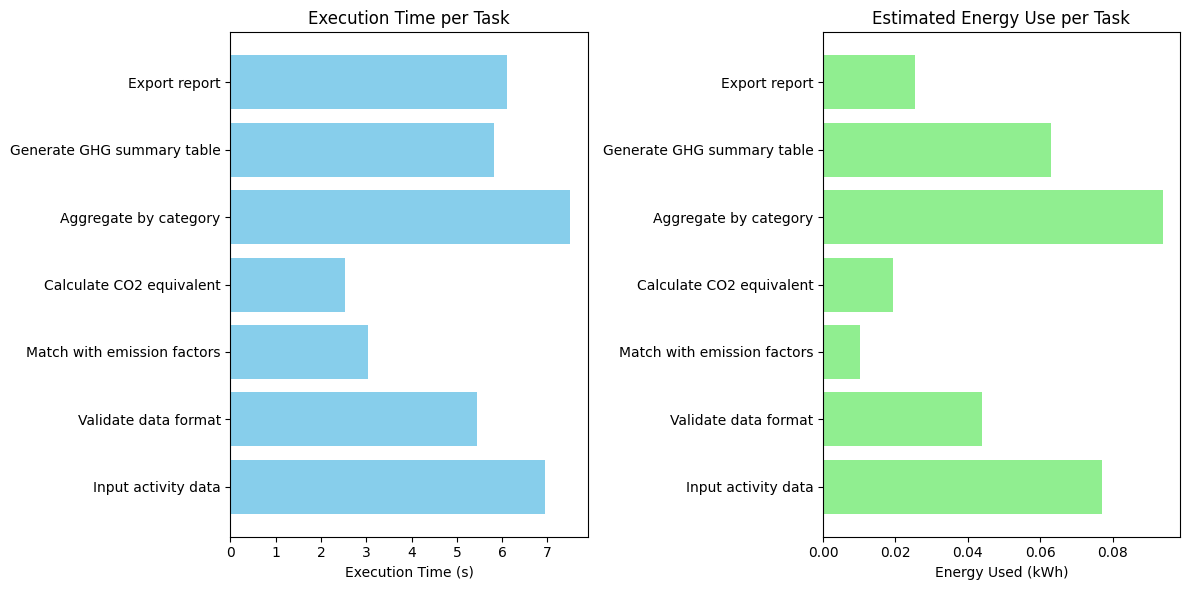

In [ ]:
import matplotlib.pyplot as plt

# Collect data
task_labels = []
exec_times = []
energy_used = []

for node in execution_order:
    task_labels.append(G.nodes[node]['label'])
    exec_times.append(G.nodes[node]['exec_time'])

    exec_time_hr = G.nodes[node]['exec_time'] / 3600
    cpu = G.nodes[node]['cpu']
    energy = exec_time_hr * cpu * 50  # 50W power usage
    energy_used.append(round(energy, 6))

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(task_labels, exec_times, color='skyblue')
plt.xlabel("Execution Time (s)")
plt.title("Execution Time per Task")

plt.subplot(1, 2, 2)
plt.barh(task_labels, energy_used, color='lightgreen')
plt.xlabel("Energy Used (kWh)")
plt.title("Estimated Energy Use per Task")

plt.tight_layout()
plt.show()


In [ ]:
# Copy the original graph
G_optimized = G.copy()

# Simulate optimization: reduce task time and CPU usage by 20–40%
for node in G_optimized.nodes():
    G_optimized.nodes[node]['exec_time'] *= random.uniform(0.6, 0.8)  # reduce time
    G_optimized.nodes[node]['cpu'] *= random.uniform(0.6, 0.8)        # reduce CPU

    # Round to 2 decimals for clarity
    G_optimized.nodes[node]['exec_time'] = round(G_optimized.nodes[node]['exec_time'], 2)
    G_optimized.nodes[node]['cpu'] = round(G_optimized.nodes[node]['cpu'], 2)


In [ ]:
def simulate_workflow(G_sim, label=""):
    exec_order = list(nx.topological_sort(G_sim))
    total_time = 0
    total_energy = 0

    for node in exec_order:
        t = G_sim.nodes[node]['exec_time']
        c = G_sim.nodes[node]['cpu']
        total_time += t
        total_energy += (t / 3600) * c * 50  # kWh

    return round(total_time, 2), round(total_energy, 6)

# Simulate both
baseline_time, baseline_energy = simulate_workflow(G, "Baseline")
optimized_time, optimized_energy = simulate_workflow(G_optimized, "Optimized")

print(f"\nBaseline: Time = {baseline_time}s, Energy = {baseline_energy} kWh")
print(f"Optimized: Time = {optimized_time}s, Energy = {optimized_energy} kWh")



Baseline: Time = 37.36s, Energy = 0.332625 kWh
Optimized: Time = 25.3s, Energy = 0.155185 kWh


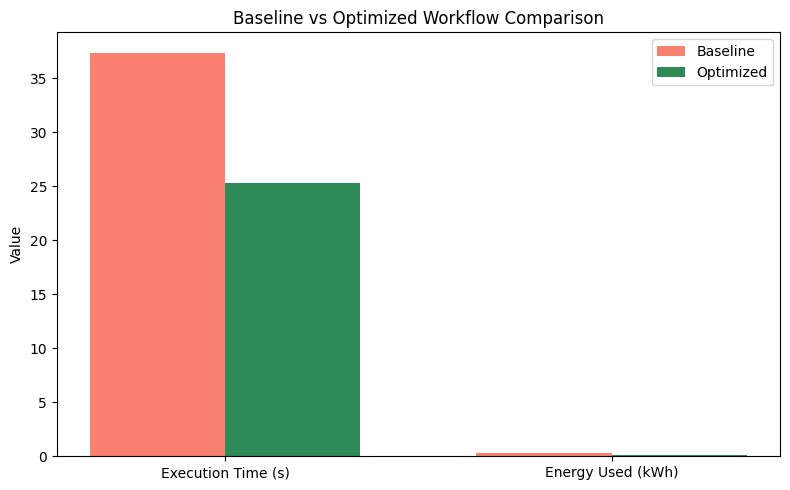

In [ ]:
import numpy as np

labels = ['Execution Time (s)', 'Energy Used (kWh)']
baseline_vals = [baseline_time, baseline_energy]
optimized_vals = [optimized_time, optimized_energy]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, baseline_vals, width, label='Baseline', color='salmon')
plt.bar(x + width/2, optimized_vals, width, label='Optimized', color='seagreen')

plt.ylabel('Value')
plt.title('Baseline vs Optimized Workflow Comparison')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()
